# Laboratorio di Simulazione Numerica

## Esercitazione 6

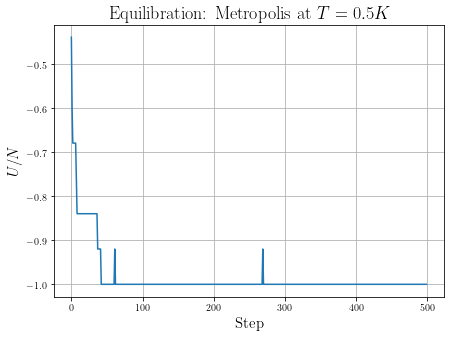

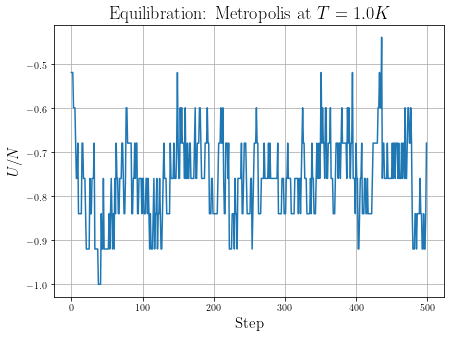

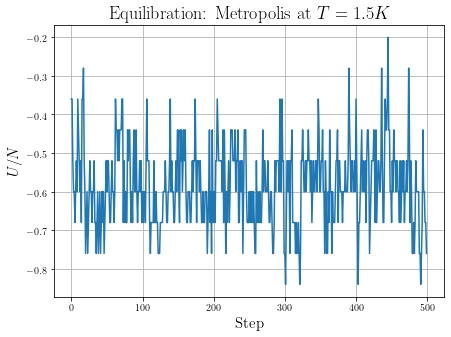

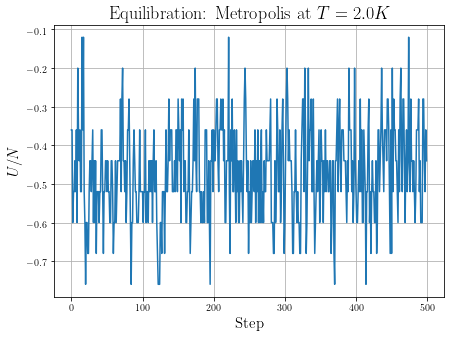

In [42]:
step = 500 #numero di blocchi
f = plt.figure(figsize=(7,5))
x = np.arange(step)
em5 = np.loadtxt("output._eq_05_gibbs.0", unpack='true', usecols=(1))
plt.plot(x, em5)
plt.title('Equilibration: Metropolis at $T = 0.5 K$', fontsize=18)
plt.ylabel('$U/N$', fontsize=15)
plt.xlabel('Step', fontsize=15)
plt.grid(True)

f = plt.figure(figsize=(7,5))
em10 = np.loadtxt("output._eq_10_gibbs.0", unpack='true', usecols=(1))
plt.plot(x, em10)
plt.title('Equilibration: Metropolis at $T = 1.0 K$', fontsize=18)
plt.ylabel('$U/N$', fontsize=15)
plt.xlabel('Step', fontsize=15)
plt.grid(True)

f = plt.figure(figsize=(7,5))
em15 = np.loadtxt("output._eq_15_gibbs.0", unpack='true', usecols=(1))
plt.plot(x, em15)
plt.title('Equilibration: Metropolis at $T = 1.5 K$', fontsize=18)
plt.ylabel('$U/N$', fontsize=15)
plt.xlabel('Step', fontsize=15)
plt.grid(True)

f = plt.figure(figsize=(7,5))
em20 = np.loadtxt("output._eq_20_gibbs.0", unpack='true', usecols=(1))
plt.plot(x, em20)
plt.title('Equilibration: Metropolis at $T = 2.0 K$', fontsize=18)
plt.ylabel('$U/N$', fontsize=15)
plt.xlabel('Step', fontsize=15)
plt.grid(True)
plt.show()

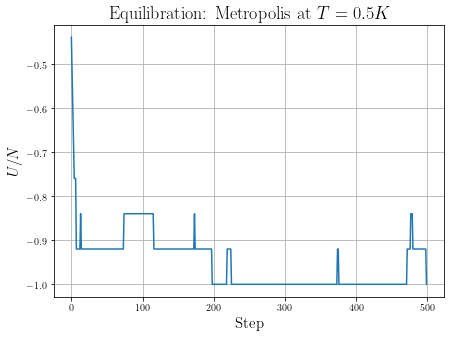

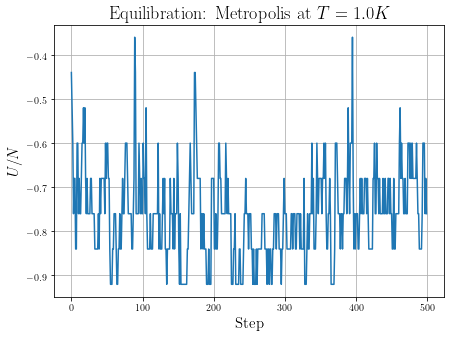

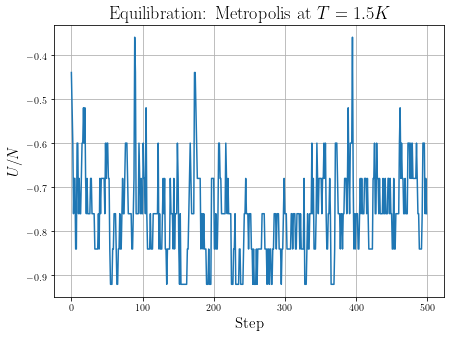

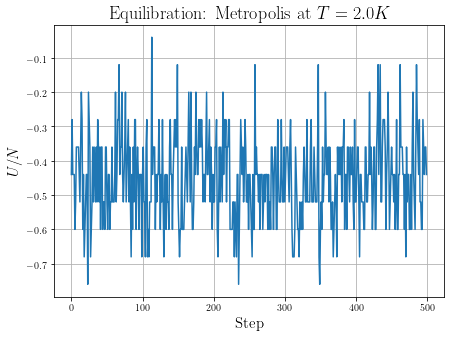

In [41]:
step = 500 #numero di blocchi
f = plt.figure(figsize=(7,5))
x = np.arange(step)
em5 = np.loadtxt("output._eq_05_metro.0", unpack='true', usecols=(1))
plt.plot(x, em5)
plt.title('Equilibration: Metropolis at $T = 0.5 K$', fontsize=18)
plt.ylabel('$U/N$', fontsize=15)
plt.xlabel('Step', fontsize=15)
plt.grid(True)

f = plt.figure(figsize=(7,5))
em10 = np.loadtxt("output._eq_10_metro.0", unpack='true', usecols=(1))
plt.plot(x, em10)
plt.title('Equilibration: Metropolis at $T = 1.0 K$', fontsize=18)
plt.ylabel('$U/N$', fontsize=15)
plt.xlabel('Step', fontsize=15)
plt.grid(True)

f = plt.figure(figsize=(7,5))
em15 = np.loadtxt("output._eq_15_metro.0", unpack='true', usecols=(1))
plt.plot(x, em15)
plt.title('Equilibration: Metropolis at $T = 1.5 K$', fontsize=18)
plt.ylabel('$U/N$', fontsize=15)
plt.xlabel('Step', fontsize=15)
plt.grid(True)

f = plt.figure(figsize=(7,5))
em20 = np.loadtxt("output._eq_20_metro.0", unpack='true', usecols=(1))
plt.plot(x, em20)
plt.title('Equilibration: Metropolis at $T = 2.0 K$', fontsize=18)
plt.ylabel('$U/N$', fontsize=15)
plt.xlabel('Step', fontsize=15)
plt.grid(True)
plt.show()

## GIBBS SAMPLING

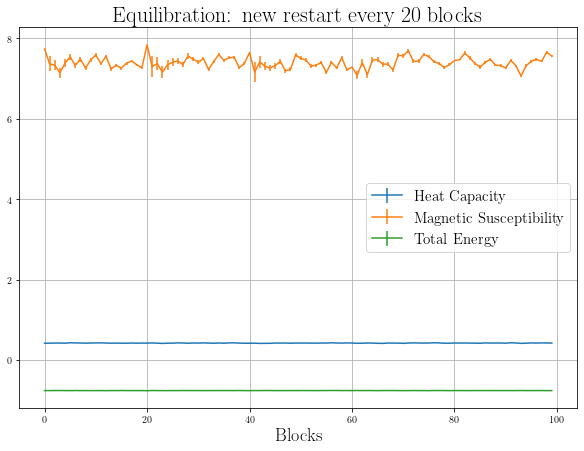

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

N = 100 #numero di blocchi

x2 = np.arange(N)
f = np.loadtxt("output.heat.0", unpack='true', usecols=(1))
errorf = np.loadtxt("output.heat.0", unpack='true', usecols=(3))
x = np.loadtxt("output.chi.0", unpack='true', usecols=(1))
errorx = np.loadtxt("output.chi.0", unpack='true', usecols=(3))
e = np.loadtxt("output.ene.0", unpack='true', usecols=(1))
errore = np.loadtxt("output.ene.0", unpack='true', usecols=(3))

plt.figure(figsize=(10,7))
plt.errorbar(x2, f, yerr=errorf, label = 'Heat Capacity')
plt.errorbar(x2, x, yerr=errorx, label = 'Magnetic Susceptibility')
plt.errorbar(x2, e, yerr=errore, label = 'Total Energy')

plt.legend(loc='best', fontsize=15)

plt.xlabel('Blocks', fontsize=18)
plt.title('Equilibration: new restart every 20 blocks', fontsize=22)
plt.grid(True)

plt.show()

Le oscillazioni fra un blocco e il successivo sono contenute generalmente entro il 5%, anche per la suscettivit√† magnetica, che raggiunge al massimo il 10% di oscillazione fra un blocco e l'altro.

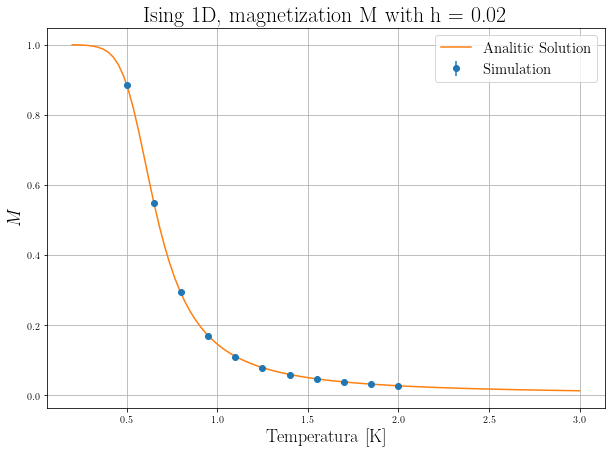

In [111]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

x2 = np.loadtxt("mag.dat", unpack='true', usecols=(0)) 
z = np.loadtxt("mag.dat", unpack='true', usecols=(2))
errorz = np.loadtxt("mag.dat", unpack='true', usecols=(3))

plt.figure(figsize=(10,7))
plt.errorbar(x2, z, yerr=errorz, label='Simulation', fmt='o')
plt.plot(T, M, label='Analitic Solution')
plt.legend(loc='best', fontsize=15)
plt.xlabel('Temperatura [K]', fontsize=18)
plt.ylabel('$M$', fontsize=18)
plt.title('Ising 1D, magnetization M with h = 0.02', fontsize=22)

plt.grid(True)

plt.show();

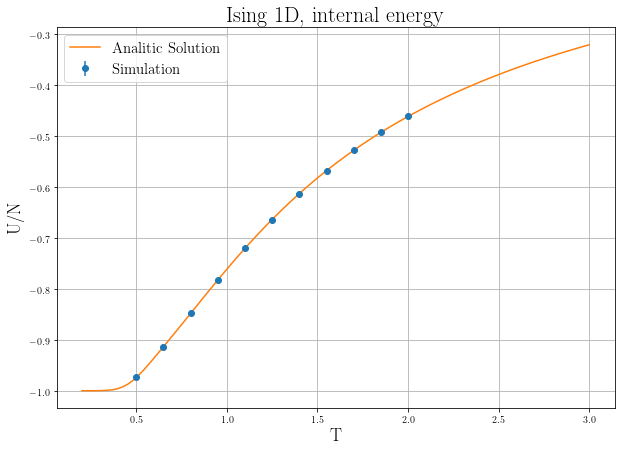

In [110]:
e = -J*( th + ch*thN )/( 1 + thN )

x2 = np.loadtxt("ene.dat", unpack='true', usecols=(0)) 
z = np.loadtxt("ene.dat", unpack='true', usecols=(2))
errorz = np.loadtxt("ene.dat", unpack='true', usecols=(3))

plt.figure(figsize=(10,7))
plt.errorbar(x2, z, yerr=errorz, label='Simulation', fmt='o')
plt.plot(T, e, label='Analitic Solution')
plt.legend(loc='best', fontsize=15)
plt.title('Ising 1D, internal energy', fontsize=22)
plt.xlabel('T', fontsize=18)
plt.ylabel('U/N', fontsize=18)

plt.grid(True)

plt.show()

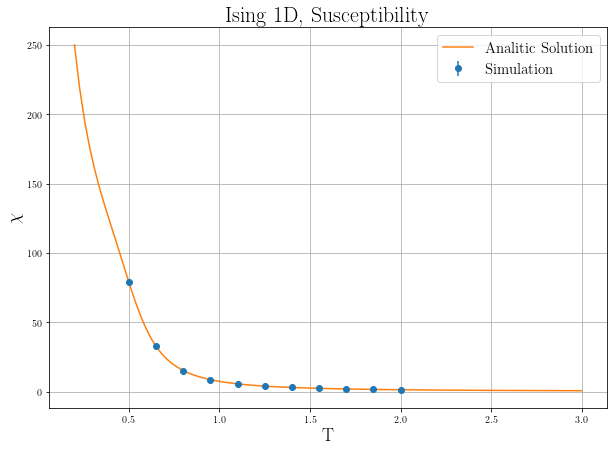

In [109]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

x2 = np.loadtxt("chi.dat", unpack='true', usecols=(0)) 
z = np.loadtxt("chi.dat", unpack='true', usecols=(2))
errorz = np.loadtxt("chi.dat", unpack='true', usecols=(3))

plt.figure(figsize=(10,7))
plt.errorbar(x2, z, yerr=errorz, label='Simulation', fmt='o')
plt.plot(T, X, label='Analitic Solution')
plt.legend(loc='best', fontsize=15)
plt.title('Ising 1D, Susceptibility', fontsize=22)
plt.xlabel('T', fontsize=18)
plt.ylabel('$\chi$', fontsize=18)
plt.grid(True)

plt.show()

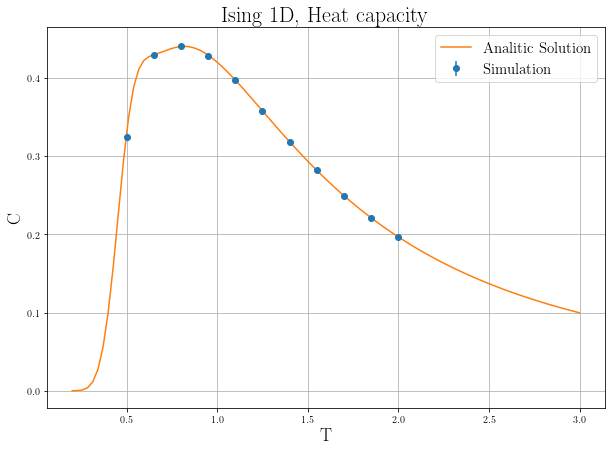

In [108]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

x2 = np.loadtxt("heat.dat", unpack='true', usecols=(0)) 
z = np.loadtxt("heat.dat", unpack='true', usecols=(2))
errorz = np.loadtxt("heat.dat", unpack='true', usecols=(3))

plt.figure(figsize=(10,7))
plt.errorbar(x2, z, yerr=errorz, label='Simulation', fmt='o')
plt.plot(T, heat, label='Analitic Solution')
plt.legend(loc='best', fontsize=15)
plt.title('Ising 1D, Heat capacity', fontsize=22)
plt.xlabel('T', fontsize=18)
plt.ylabel('C', fontsize=18)

plt.grid(True)

plt.show()

## METROPOLIS

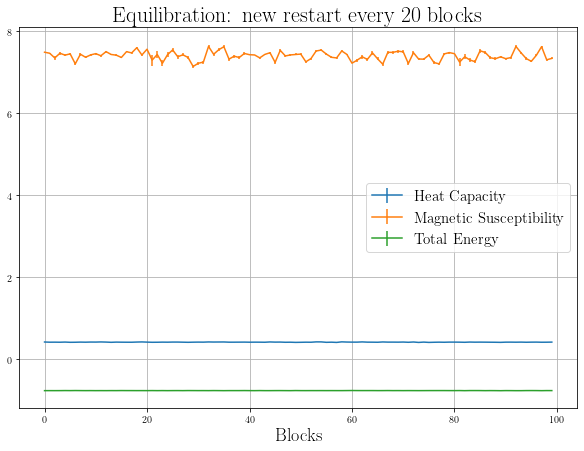

In [107]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

N = 100 #numero di blocchi

x2 = np.arange(N)
f = np.loadtxt("output.heat_metro.0", unpack='true', usecols=(1))
errorf = np.loadtxt("output.heat_metro.0", unpack='true', usecols=(3))
x = np.loadtxt("output.chi_metro.0", unpack='true', usecols=(1))
errorx = np.loadtxt("output.chi_metro.0", unpack='true', usecols=(3))
e = np.loadtxt("output.ene_metro.0", unpack='true', usecols=(1))
errore = np.loadtxt("output.ene_metro.0", unpack='true', usecols=(3))

plt.figure(figsize=(10,7))
plt.errorbar(x2, f, yerr=errorf, label = 'Heat Capacity')
plt.errorbar(x2, x, yerr=errorx, label = 'Magnetic Susceptibility')
plt.errorbar(x2, e, yerr=errore, label = 'Total Energy')

plt.legend(loc='best', fontsize=15)
plt.xlabel('Blocks', fontsize=18)
plt.title('Equilibration: new restart every 20 blocks', fontsize=22)
plt.grid(True)

plt.show()

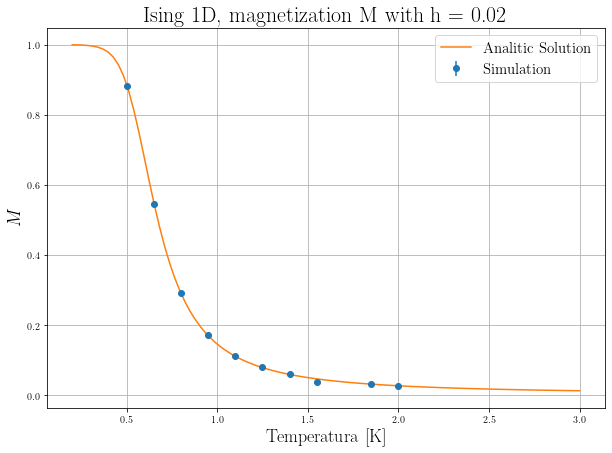

In [99]:
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

x2 = np.loadtxt("mag_metro.dat", unpack='true', usecols=(0)) 
z = np.loadtxt("mag_metro.dat", unpack='true', usecols=(2))
errorz = np.loadtxt("mag_metro.dat", unpack='true', usecols=(3))

plt.figure(figsize=(10,7))
plt.errorbar(x2, z, yerr=errorz, label='Simulation', fmt='o')
plt.plot(T, M, label='Analitic Solution')

plt.legend(loc='best', fontsize=15)
plt.xlabel('Temperatura [K]', fontsize=18)
plt.ylabel('$M$', fontsize=18)
plt.title('Ising 1D, magnetization M with h = 0.02', fontsize=22)

plt.grid(True)

plt.show();

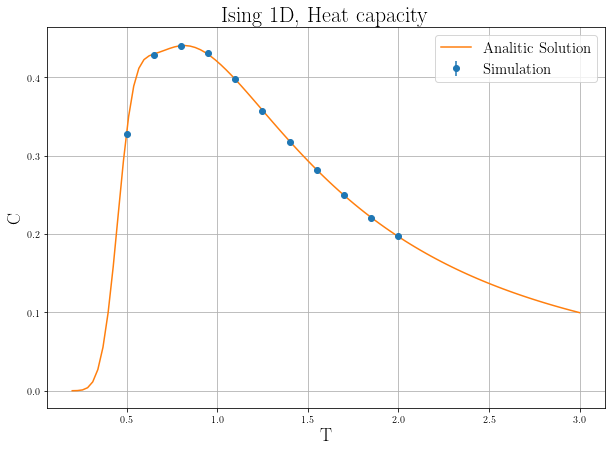

In [92]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

x2 = np.loadtxt("heat_metro.dat", unpack='true', usecols=(0)) 
z = np.loadtxt("heat_metro.dat", unpack='true', usecols=(2))
errorz = np.loadtxt("heat_metro.dat", unpack='true', usecols=(3))

plt.figure(figsize=(10,7))
plt.errorbar(x2, z, yerr=errorz, label='Simulation', fmt='o')
plt.plot(T, heat, label='Analitic Solution')

plt.legend(loc='best', fontsize=15)
plt.title('Ising 1D, Heat capacity', fontsize=22)
plt.xlabel('T', fontsize=18)
plt.ylabel('C', fontsize=18)

plt.grid(True)

plt.show()

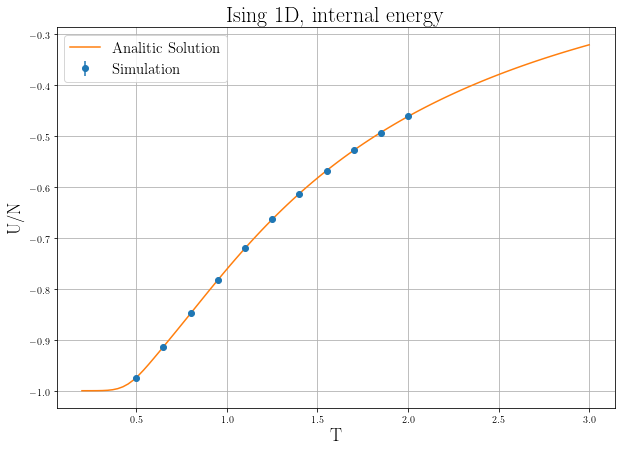

In [94]:
e = -J*( th + ch*thN )/( 1 + thN )

x2 = np.loadtxt("ene_metro.dat", unpack='true', usecols=(0)) 
z = np.loadtxt("ene_metro.dat", unpack='true', usecols=(2))
errorz = np.loadtxt("ene_metro.dat", unpack='true', usecols=(3))

plt.figure(figsize=(10,7))
plt.errorbar(x2, z, yerr=errorz, label='Simulation', fmt='o')
plt.plot(T, e, label='Analitic Solution')

plt.legend(loc='best', fontsize=15)
plt.title('Ising 1D, internal energy', fontsize=22)
plt.xlabel('T', fontsize=18)
plt.ylabel('U/N', fontsize=18)

plt.grid(True)

plt.show()

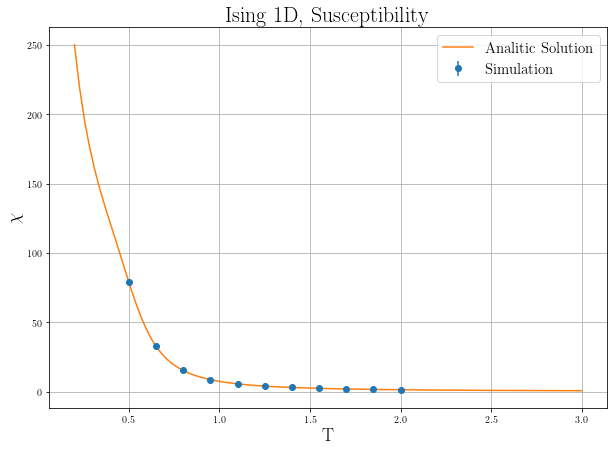

In [98]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

x2 = np.loadtxt("chi_metro.dat", unpack='true', usecols=(0)) 
z = np.loadtxt("chi_metro.dat", unpack='true', usecols=(2))
errorz = np.loadtxt("chi_metro.dat", unpack='true', usecols=(3))

plt.figure(figsize=(10,7))
plt.errorbar(x2, z, yerr=errorz, label='Simulation', fmt='o')
plt.plot(T, X, label='Analitic Solution')

plt.legend(loc='best', fontsize=15)
plt.title('Ising 1D, Susceptibility', fontsize=22)
plt.xlabel('T', fontsize=18)
plt.ylabel('$\chi$', fontsize=18)

plt.grid(True)

plt.show()